# 実践機械学習勉強会 Part 1 Metrics
> 予測モデルの評価指標に関して、最適化も含め学ぶ。

- toc: true 
- badges: false
- comments: true
- categories: [実践機械学習]
- image: images/ML_logo.png

参考図書 {% fn 1 %}

# 回帰問題（Regression）に使われる評価指標
  - MSE, RMSE, R-squared
  - MAE
  - (R)MSPE, MAPE
  - (R)MSLE

notation
  - $N$ : オブジェクト数
  - $y\in\mathbb{R}^N$ : ターゲット値のN次元ベクトル
  - $\hat y\in\mathbb{R}^N$ : 予測値のN次元ベクトル
  - $y_i\in\mathbb{R}$ : オブジェクト$x_i$のターゲット値
  - $\hat y_i\in\mathbb{R}$ : オブジェクト$x_i$の予測値
  

## MSE, RMSE, R-squared

### MSE: Mean Square Error 

$$MSE(y,\hat y)=\frac{1}{N}\sum^N_{i=1}(y_i-\hat y_i)^2$$

評価指標の特性を考える際、一定の予測値$\hat y_i = \alpha$がどの値をとる時に一番良い評価指標の値が得られるかを考えると良く、今回は

$$ 
\min_{\alpha} f(\alpha) = \frac{1}{N} \sum_{i=1}^N (\alpha - y_i)^2
$$

のように$\alpha$に関して微分可能な関数$f(\alpha)$の最小化問題に帰結できます。これを満たす$\alpha^*$の必要条件は

$$
\frac{d f}{d \alpha}\bigg|_{\alpha=\alpha^*} = 0\
$$

となります。よってこれを解くと、
$$
\frac{d f}{d \alpha}\bigg|_{\alpha=\alpha^*} = \frac{2}{N} \sum_{i=1}^N (\alpha^* - y_i) = 0
$$

$$
\frac{2}{N} \sum_{i=1}^N \alpha^* - \frac{2}{N} \sum_{i=1}^N y_i = 0
$$

$$
 \alpha^* - \frac{1}{N} \sum_{i=1}^N y_i = 0
$$

より、
$$
 \alpha^* =  \frac{1}{N} \sum_{i=1}^N y_i(=\bar y)
$$

$\alpha^*$における２次導関数 $\frac{d^2 f}{d \alpha^2}$ は正なのでMSEにおけるbest constantは、ターゲット値の平均(target mean value)となります。


### RMSE: Root Mean Square Error
$$
RMSE=\sqrt{MSE}
$$
$$
\frac{\partial RMSE}{\partial\hat y_i}=\frac{1}{2\sqrt{MSE}}\frac{\partial MSE}{\partial\hat y_i}
$$

### R-squared
$$
R^2=1-\frac{MSE}{\frac{1}{N}\sum^N_{i=1}(y_i-\bar y)^2}
$$

### 最適化の仕方
MSE・RMSE・R-squaredは基本的に同じ意味を持つ評価指標で、また最適化する際もそのまま目的関数として使用することができます。詳しくは各ライブラリのdocを読みましょう。

## MAE: Mean Absolute Error
$$ 
MAE(y, \hat y) = \frac{1}{N} \sum_{i=1}^N |\hat y_i - y_i|
$$
同様にbest constant $\alpha^*$を求めてみましょう。
$$ 
\min_{\alpha} f(\alpha) = \frac{1}{N} \sum_{i=1}^N |\alpha - y_i|
$$

ここで $ \frac{\partial |x|}{dx} = sign(x)$（$sign$ は [符号関数]((https://ja.m.wikipedia.org/wiki/符号関数), [signum function](https://en.wikipedia.org/wiki/Sign_function)を指す）であるので、
$$
\frac{d f}{d \alpha}\bigg|_{\alpha=\alpha^*} = \frac{1}{N} \sum_{i=1}^N sign(\alpha^* - y_i) = 0
$$

定数項を無視すると、
$$
g(\alpha^*) = \sum_{i=1}^N sign(\alpha^* - y_i) = 0
$$
をみたす $\alpha^*$ を求めればよいことが分かります。例えばここで、ターゲットのN次元ベクトルが$y=[-3,-1,-1.5,0,1,2,3]$とすると、$g(\alpha)$のグラフは以下のようになります。

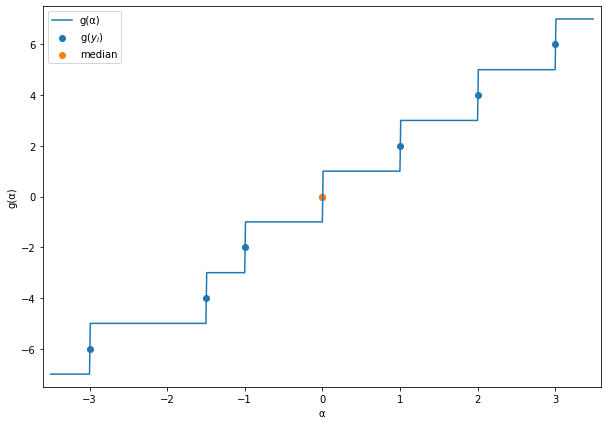

In [1]:
#collapse-hide
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sgn(x,y):
  if x < y:
    return -1
  elif x == y:
    return 0
  else:
    return 1

def g(alpha,y):
  total = 0
  for i in y:
    total += sgn(alpha,i)
  return total

y = np.array([-3,-1,-1.5,0,1,2,3])
alpha = np.arange(y.min()-0.5,y.max()+0.5,0.01)
median = np.median(y)

gs_a = []
for a in alpha:
  gs_a.append(g(a,y))

gs_y = []
for yi in y:
  gs_y.append(g(yi,y))

plt.figure(figsize=(10,7))
plt.xlabel("α")
plt.ylabel('g(α)')
plt.xlim(alpha.min()-0.1,alpha.max()+0.1)
plt.ylim(-len(y)-0.5,len(y)+0.5)
plt.plot(alpha,gs_a,label='g(α)')
plt.scatter(y,gs_y,label='g($y_i$)')
plt.scatter(median,g(median,y),label='median')
plt.legend(loc='upper left')
plt.show()

このように、値がN回不連続的に飛び飛びの値をとることがわかり、０になるには約$\frac{N}{2}$回飛ばなければならないことが分かります。グラフの様にその値はターゲットの中央値（target median）となることが分かります。Nが偶数奇数の場合分けが必要ですが、いずれの場合もbest constantはtarget medianとなります。

> note: MAEのbest constantはターゲットの中央値であることから、MAEはターゲットの外れ値（outliers）の影響を受けずらいことが分かる。一方MSEはoutliersの影響を受けやすい。よって、ターゲットにouteliersを含む場合はMAEがよりrobustな評価指標と言える。

### 最適化の仕方
MAEも目的関数として扱うことができますが、$\hat y_i=y_i$の時に微分可能でないのでsmoothingして0に近いエラーに関しても処理できるようにする必要があります。このsmoothingには様々な方法がありますが、有名なものに[Huber loss](https://en.wikipedia.org/wiki/Huber_loss)があります。0に近い時はMSE、エラーが大きい値ではMAEのような挙動を示す関数です。詳しくは各ライブラリのdocを読みましょう。

## (R)MSPE, MAPE: Percentage Error
単純なMSEやMAEでは、ターゲットの値が大きい時に同じ精度の予測値に対して過小評価されてしまいます。例えば、
$$
MSE(10,9)=1
$$
$$
MSE(1000,900)=10000
$$
のように同じ90％の予測精度でもMSEの値が大きくなることが分かります。そこで、MSE・MAEそれぞれに対し、ターゲット値の逆数で重みを付けた評価指標がそれぞれMSPE・MAPEという訳です。
$$
MSPE(y,\hat y)=\frac{100\%}{N}\sum^N_{i=1}(\frac{y_i-\hat y_i}{y_i})^2
$$
$$
MAPE(y,\hat y)=\frac{100\%}{N}\sum^N_{i=1}|\frac{y_i-\hat y_i}{y_i}|
$$

それではそれぞれのbest constantはどの値をとるのでしょうか？
MSPE、MAPEそれぞれその値は重み付け平均値、重み付け中央値を取ります。小さい値のターゲットに重みを大きくつけた新しいターゲット値の平均、中央値という訳です。ターゲット値に$w_i=\frac{1/y_i}{\sum^N_{i=1}1/y_i}$を付加した後、MSE・MAE同様の議論をすれば証明できます。

### 最適化の仕方
MSPE・MAPEを直接モデル最適化の目的関数として扱うことは難しく、以下のステップが必要となります。
1. ターゲットの値を用いて各オブジェクト$x_i$に対してSample weights: $w_i$を対応させる
2. その重みに従って新たに元のデータからサンプリングを行う
3. サンプリングされた新たなデータセットに対して、MSE・MAEを適用する 

$w_i$に関してはMSPE・MASEについてそれぞれ、
$$
MSPE: w_i=\frac{1/y_i^2}{\sum^N_{i=1}1/y_i^2}
$$
$$
MAPE: w_i=\frac{1/y_i}{\sum^N_{i=1}1/y_i}
$$
となります。


> note: $w_i$の合計は必ずしも１である必要はない。また、サンプル数はもとのデータセットのオブジェクト数Nを超えても良い。

## (R)MSLE: (Root) Mean Square Logarithmic Error
$$
RMSLE(y,\hat y)=\sqrt{\frac{1}{N}\sum^N_{i=1}(log(y_i+1)-log(\hat y_i+1))^2} =RMSE(log(y+1),log(\hat y+1))=\sqrt{MSE(log(y+1),log(\hat y+1))}
$$
こちらもターゲットのスケールによる誤差の見積もり変化に対して、頑強な評価指標です。MSEの対数バージョンということですね。

ではbest constantはどの値をとるかというとこの場合はlog spaceでのtarget meanです。log spaceでの平均が分かった後にその値を指数化して戻してあげる必要がありますがコンセプトはMSEと変わりません。

### 最適化の仕方
これも単純に目的関数としては使えないので以下のステップが必要です。
1. ターゲット値をlog spaceに変換する; $z_i=log(y_i+1)$
2. 変換された新しいターゲットに対して、目的関数をMSEに設定しモデルをfitする
3. 予測値を指数化し想定されるスケールに戻す; $\hat y_i=exp(\hat z_i)-1$

詳しくは各ライブラリのdocを読みましょう。

# 分類問題（Classification）に使われる評価指標
  - Accuracy
  - Logarithmic Loss
  - Area under ROC curve
  - (Quadratic weighted) Kappa

notation
  - $N$ : オブジェクト数
  - $L$ : カテゴリ数
  - $y$ : 真値
  - $\hat y$ : 予測値
  - $[a=b]$ : 1 if a=b else 0

## Accuracy
$$
Accuracy=\frac{1}{N}\sum^N_{i=1}[\hat y_i=y_i]
$$
この指標はクラス予測がどのくらいの頻度で正しいか表しています。best constantは最も現れる頻度の高いカテゴリ値です。例えばターゲットに猫が10、犬が90あるとしたら、常にイッヌと予測したら0.9が得られ最大となります。

### 最適化の仕方
1. 何でもいいのである評価指標でモデルを最適化・fitする
2. 最適化済みのモデルの各カテゴリに対する確率予測値に対して、閾値を調節する

閾値の最適解によってそのモデルの実力を最も発揮したAccuracyが求められます。
詳しくは各ライブラリのdocを読みましょう。

## Logarithmic Loss
Binary 
$$
LogLoss=-\frac{1}{N}\sum^N_{i=1}y_ilog(\hat y_i)+(1-y_i)log(1-\hat y_i)
$$
Multiclass
$$
LogLoss=-\frac{1}{N}\sum^N_{i=1}\sum^L_{l=1}y_{il}log(\hat y_{il})
$$

2値分類と多クラス分類のタスクで上のように書き分けられますが、多クラス分類の方は一般化されている形になっています。実践的には$log$の中身$x$に対して$10^{-15}\leqq x \leqq 1-10^{-15}$のようにクリッピングした関数
$$
LogLoss=-\frac{1}{N}\sum^N_{i=1}\sum^L_{l=1}y_{il}log(min(max(\hat y_{il},10^{-15}),1-10^{-15}))
$$

が使われます。下のグラフはターゲットが０の時の予測確率値とLogLossを示していますが、誤ったクラスの予測確率値が大きいほど、つまり間違った答えをはっきりこれだと言ってしまうほど大きいペナルティが課せられることが分かります。

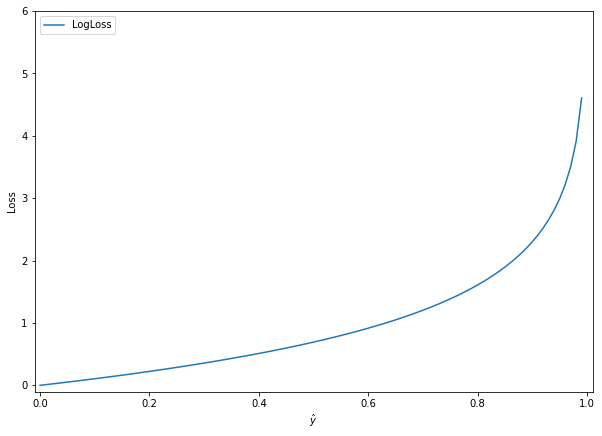

In [2]:
#collapse-hide
y_pred = np.arange(0,1,0.01)

def logloss(y_pred):
  return -np.log(1-y_pred)

plt.figure(figsize=(10,7))
plt.xlabel("$\hat y$")
plt.ylabel('Loss')
plt.xlim(-0.01,1.01)
plt.ylim(-0.1,6)
plt.plot(y_pred,logloss(y_pred),label='LogLoss')
plt.legend(loc='upper left')
plt.show()

best constantは各カテゴリの頻度値となります。猫1割、犬9割だったら猫0.1、犬0.9と常に予測するときに最小のLossが得られます。

### 最適化の仕方
これは目的関数として設定できます。そのまま使いましょう。詳しくは各ライブラリのdocを読みましょう。

## Area under ROC curve
2値分類においてモデルのNegativeの予測確率値を小さい順に並び替えた時に、ある値より前の対応するターゲットが全てPositive、後は全てNegativeになる場合、閾値を適切に設定すればAccuracy100％の完全なモデルであることが分かります。つまりある閾値を境に綺麗にpositiveからnegativeを予測できていることが理想です。しかし、現実は予測確率をsortした時に対応するターゲットは綺麗に並んでくれはしません。本来positiveの所にnegativeが来てしまうことがあるのです。このようにどれくらい綺麗な並びでpositiveとnegativeを分けられているかを示すのがこの評価指標です。詳しいアルゴリズムは以下の動画が分かりやすく説明しているので参考にして下さい。
> youtube: https://www.youtube.com/watch?v=4jRBRDbJemM


それではbest constantはどの値をとるのでしょうか。この評価指標のアルゴリズムから分かるように、予測確率の大きさの順番しかこのスコアに影響しないので、どの値でも$AUC=0.5$と同じスコアになります。
> note: ランダムに予測した場合予測確率の大小順はばらばらになるので$AUC=0.5$となり、最低値となる。

### 最適化の仕方
これを目的関数として設定できるモデルライブラリがあるのでその場合はそのまま使いましょう。そうでない場合はLogLossを最適化することで代用できます。詳しくは各ライブラリのdocを読みましょう。

## Kappa

### Cohen's Kappa 
お馴染みの例、猫10、犬90の場合、すべて犬と予想するだけで$Accuracy=0.9$となりますが、このようにモデルには最低限これはいけるっしょ的な精度、つまりBaseline Accuracyなるものが存在します。この値でAccuracyをscalingしたものがKappaという指標です。

詳しいアルゴリズムについて説明します。
例えば猫20、犬80と結果的に予測したとするとこの予測値をオブジェクトごとに適当に並び変えても最低限、$0.2*0.1+0.8*0.9=0.74$のAccuracyが得られます。このようにBaseline Accuracyは以下の様に定義できます。
$$
p_e=\frac{1}{N^2}\sum_kn_{k1}n_{k2}
$$
ここで$k$は予測したカテゴリ値、$n_{k1}$、$n_{k2}$はそれぞれカテゴリkの予測した数、ターゲット内の数を示します。
そしてKappaは
$$
Cohen's Kappa=1-\frac{1-accuracy}{1-p_e}
$$
または
$$
Cohen's Kappa=1-\frac{error}{baseline error} 
$$
と表されます。

### Weighted Kappa
この$error$と$baseline error$に関して与えられた重みでscalingしたものがこの指標です。例えば猫を犬と間違えたらそれは万死に値すると考える人によって、予測値犬、ターゲット猫に対応する重みは100000と設定されるとそこのペナルティが大きくなるのは明白ですね。この重み付けの種類によって以下のように名前が変わります。

Linear weights
$$
w_{ij}=|i-j|
$$
Quadratic weights
$$
w_{ij}=(i-j)^2
$$
ここでi、jはそれぞれターゲット、予測のクラス値です。比較的データサイエンスコンペティションで使われる指標であるQuadratic Weighted Kappaは予測値とターゲットの距離をerrorと捉えたMSEのような側面も持ち合わせていることが分かります。

### 最適化の仕方（Quadratic Weighted Kappa）
目的関数そのままで扱うことは難しいため、以下のステップが必要となります。
1. MSEを評価指標に設定しモデルを最適化 
2. Accuracyが最大となるように閾値を調節

または、
1. 微分可能な近似関数を設計
2. GBDT（Gradient Boosting Decision Tree）やNeural net系のモデルに設計した関数を目的関数として設定し最適化

前者の方が行いやすいです。また、後者の近似関数の参考として以下の[論文](https://arxiv.org/abs/1509.07107)があります。
詳しくは各ライブラリのdocを読みましょう。


# 最後に
結構盛沢山の評価指標ですが、基本的にKaggleではコンペティションの指定した評価指標について最良のスコアを目指すだけです。しかし、現実社会の問題を考える時に、データや問題の特性に対応した最適な評価指標があります。自分で評価指標を決定しその指標に対してモデルを最適化するデータサイエンスの基本を知ることは広く役に立つと考えます。

{{ '[『How to Win a Data Science Competition: Learn from Top Kagglers』(National Research University Higher School of Economics, week3)](https://www.coursera.org/learn/competitive-data-science)' | fndetail: 1 }}